### Random Forest Classifier - Bagging 

![image.png](attachment:image.png)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X=df.drop(columns='Drug')
Y=df[['Drug']]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [9]:
Y['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

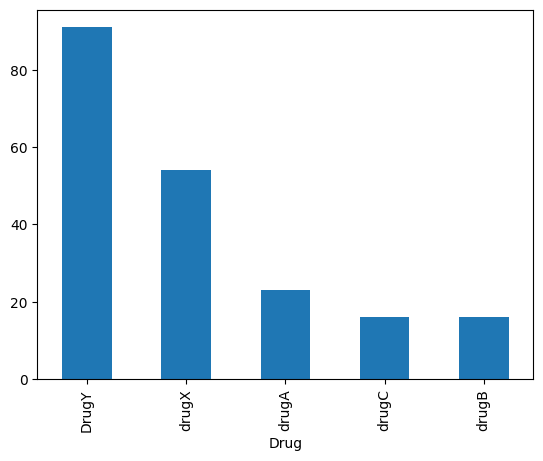

In [10]:
Y['Drug'].value_counts().plot(kind='bar')

In [11]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'BP', 'Cholesterol']

In [13]:
con

['Age', 'Na_to_K']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='mean')),
                          ('scalar',StandardScaler())]))

In [16]:
cat_pipe=Pipeline(steps=([('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))]))

In [17]:
pre=ColumnTransformer([('con',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [20]:
X_pre=pre.fit_transform(X)
X_pre.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [22]:
xtrain.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
7,-0.200874,-0.700468,0.0,1.0,0.0,1.0,0.0,1.0,0.0
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,-0.806828,-0.674101,0.0,1.0,1.0,0.0,0.0,0.0,1.0
175,1.738179,0.314121,1.0,0.0,1.0,0.0,0.0,1.0,0.0
140,0.283889,-1.362151,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [23]:
ytrain.head()

,Drug
7,drugC
95,drugX
156,drugA
175,DrugY
140,drugA


In [24]:
xtest.head()

,con__Age,con__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [26]:
xtrain.shape

(134, 9)

In [27]:
xtest.shape

(66, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
